# ADS-DV Week 3 Assignment 1

# Two useful chart types for exploring

# Summary
This assignment first shows two useful chart types: parallel coordinates and scatter matrix. You will practice these plots using a new dataset.


## Parallel coordinates with Pandas

First, we import the required libraries, using standard conventions. For the example of parallel coordinates we shall use the famous iris data set, describing the sepal and petal dimensions for three types of irises.

In [3]:
import pandas as pd
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', sep=',', low_memory=False, encoding = 'ISO-8859-1', header=None)
iris.columns = ['sepal width','sepal length','petal width','petal length', 'name']

iris.head()

,sepal width,sepal length,petal width,petal length,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now we do not use matplotlib directly but use a plot function of the pandas library that uses matplotlib in the background. In this case we create a parallel coordinates plot.

Pandas has many plotting function as can be seen here: http://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates

The parallel coordinates plot can give insight into a dataset with a large number of features. For the iris set there are four features (petal width, petal length, sepal width, sepal length).

While you can make a scatter plot with 4 features using x,y,color and size; a parallel coordinates plot is usually easier to understand once you know how to read it. Here would be the scatter plot:

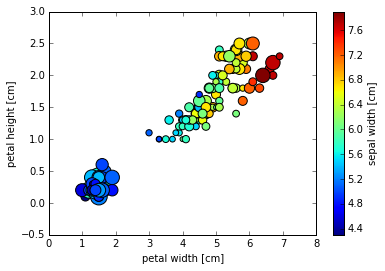

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure()
plt.scatter(iris['petal width'], iris['petal length'], c=iris['sepal width'], s=iris['sepal length']**4)
plt.xlabel('petal width [cm]')
plt.ylabel('petal height [cm]')
plt.colorbar(label='sepal width [cm]');


And the following code creates a parallel coordinates plot, which now clearly shows the distinction between the three types of iris.

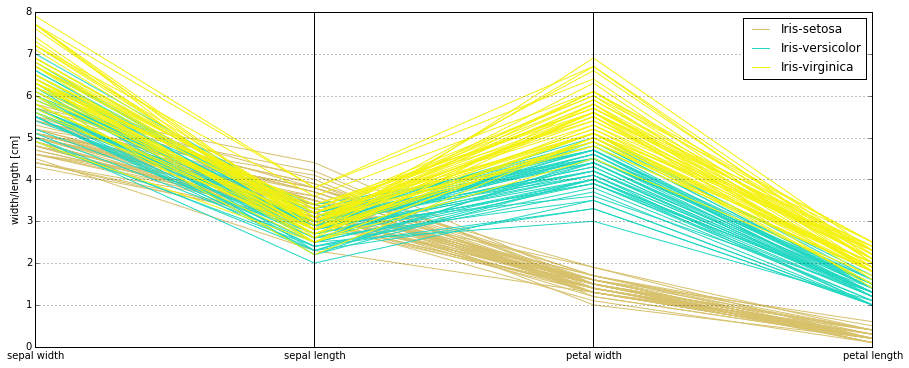

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from pandas.tools.plotting import parallel_coordinates
%matplotlib inline 

fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(iris,'name')
ax.set_ylabel('width/length [cm]');


## Scatter matrix with Pandas

A scatter matrix is a chart that gives you an overview of the correlations between any number of feaures.

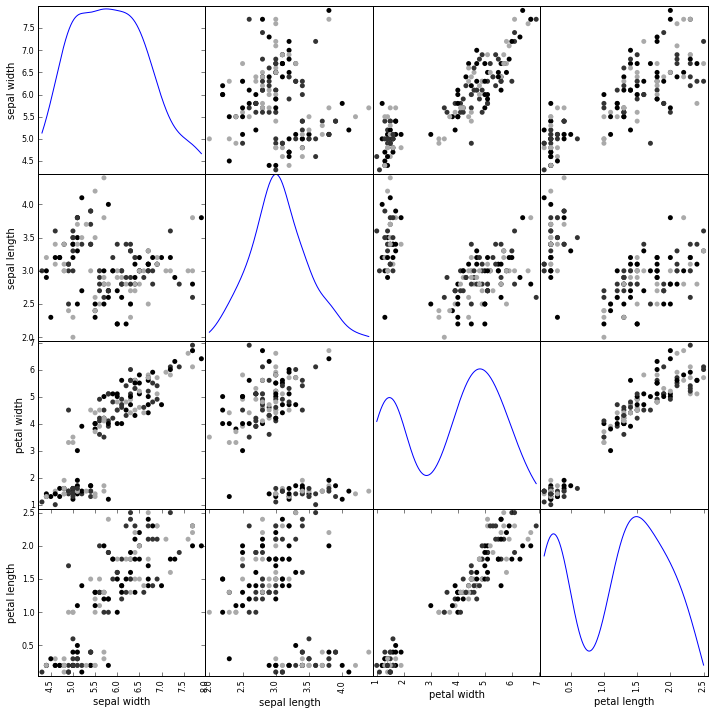

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris, alpha=1, figsize=(12, 12), diagonal='kde', c=['#aaaaaa','#333333','#000000'], s=100, linewidth=0);


## Assignment
Now try to create similar plots for a new dataset about car features.

In [7]:
# The data file is quite nasty with several different delimeters that read_csv cannot handle very well
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name','j','k','l','m','n']
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delimiter=r"\s+", names=names, header=None, engine='python')
# Create a subset of dataset with all useful features
cars = cars.iloc[:,[0,1,2,4,5,6,7]]

# Create a normalized dataset
cars_norm = (cars - cars.mean()) / (cars.max() - cars.min())
print(cars_norm.shape)
print(cars_norm.values)
cars.head()

(398, 7)
[[-0.14666417  0.50904523  0.29347318 ..., -0.21238634 -0.50083752
  -0.28643216]
 [-0.22645141  0.50904523  0.40458429 ..., -0.24214824 -0.50083752
  -0.28643216]
 [-0.14666417  0.50904523  0.32189695 ..., -0.27191015 -0.50083752
  -0.28643216]
 ..., 
 [ 0.22567625 -0.29095477 -0.15097126 ..., -0.23619586  0.49916248
  -0.28643216]
 [ 0.11929327 -0.29095477 -0.18973095 ...,  0.18047081  0.49916248
  -0.28643216]
 [ 0.19908051 -0.29095477 -0.19231493 ...,  0.22808985  0.49916248
  -0.28643216]]


,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18,8,307,3504,12.0,70,1
1,15,8,350,3693,11.5,70,1
2,18,8,318,3436,11.0,70,1
3,16,8,304,3433,12.0,70,1
4,17,8,302,3449,10.5,70,1


First, create a parallel coordinates plot. What happens when you do not use the normalized data?

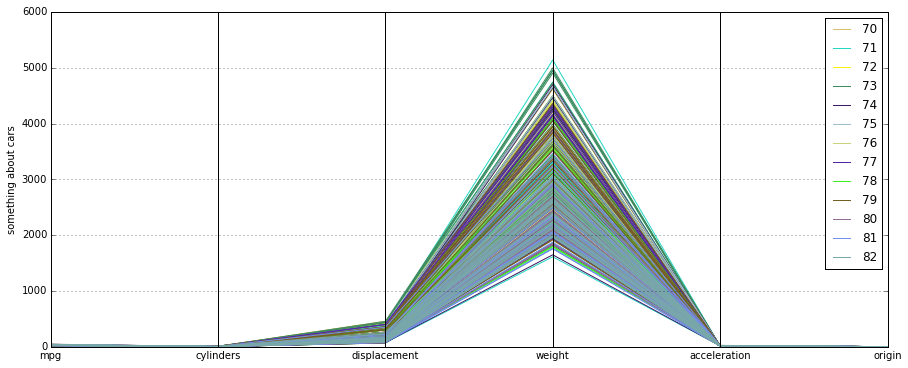

In [8]:
# Create the parallel coordinates plot here
fig = plt.figure(figsize=[15,6])
ax1 = parallel_coordinates(cars, 'model year')
ax1.set_ylabel('something about cars')

Answer this question: What conclusions can you make from the relation between weight and acceleration? If you don't understand how to interpret parallel coordinates plots, read: https://eagereyes.org/techniques/parallel-coordinates.


## Answer here in Markdown
When using not normalized data large/small values will simply not be visible and don't stand in any correlation to each other.


Next, try to highlight the model years > 80. 

Hints: 
* you can slice your data with ```cars_norm[cars['model year']>=80]```.
* you can plot both all data and the sliced data on top of each other with different colors  

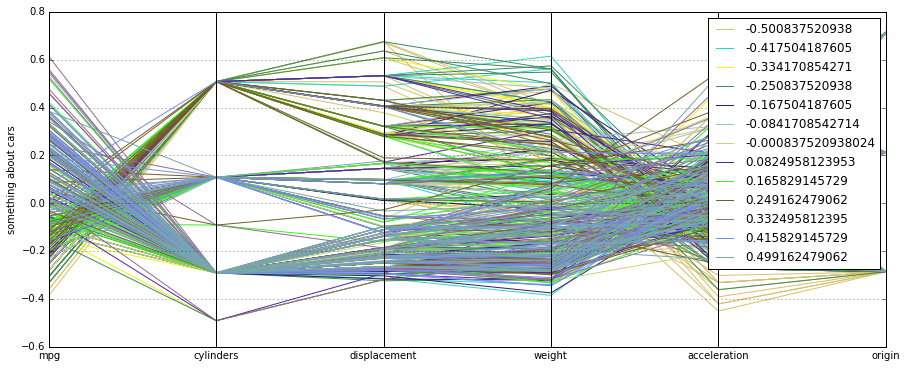

In [9]:
# Create the parallel coordinates plot here
fig = plt.figure(figsize=[15,6])
ax2 = parallel_coordinates(cars_norm, 'model year')
ax2.set_ylabel('something about cars')



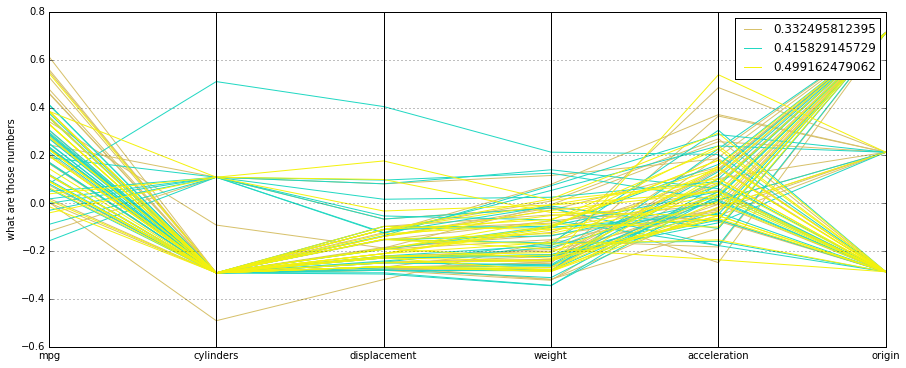

In [11]:
fig = plt.figure(figsize=[15,6])

ax3 = parallel_coordinates(cars_norm[cars['model year']>=80], 'model year')
ax3.set_ylabel('what are those numbers')

Answer this question: what conclusions can you draw from cars with model years 80-82?

In [10]:
- less cylinders

Now, create a scatter matrix for the car data. 
Do we need to use the normalized data?
Are we looking for a dataset that we can easily cluster or will we get more luck looking for trends?

I tried both data. Normalized data is not needed in this plot. Seeing the plots it doesn't seem easy to cluster this set, so mostly likely looking for trends will be the way to go.

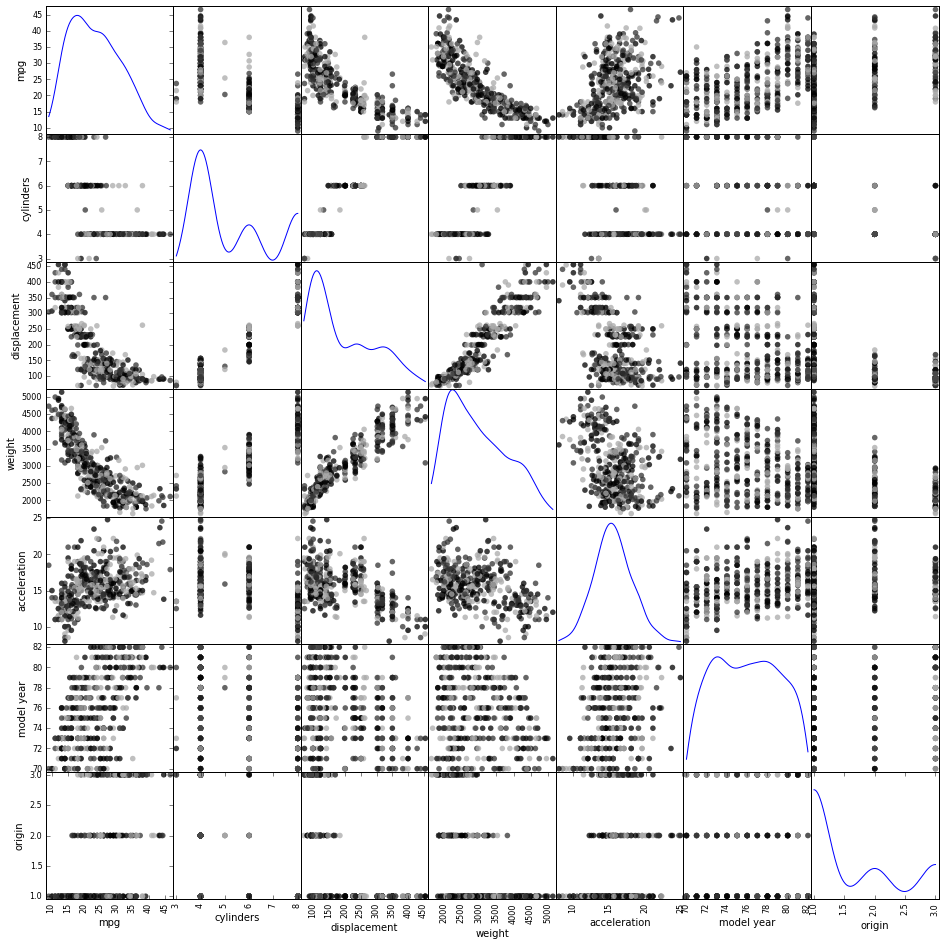

In [26]:
## Create the scatter matrix here
scatter_matrix(cars, alpha=0.75, figsize=(16, 16), diagonal='kde', c=['#aaaaaa','#333333','#000000',], s=125, linewidth=0);